In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/train.csv', parse_dates=['datetime'])
display(df.head(3))
print(df.info())

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB
None


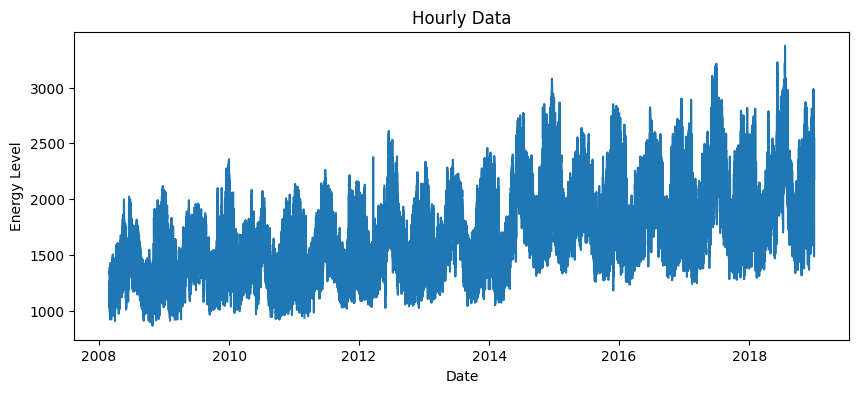

In [22]:
# plot current in train over dates
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df.datetime, df.energy)
ax.set_title('Hourly Data')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Level')
plt.show()

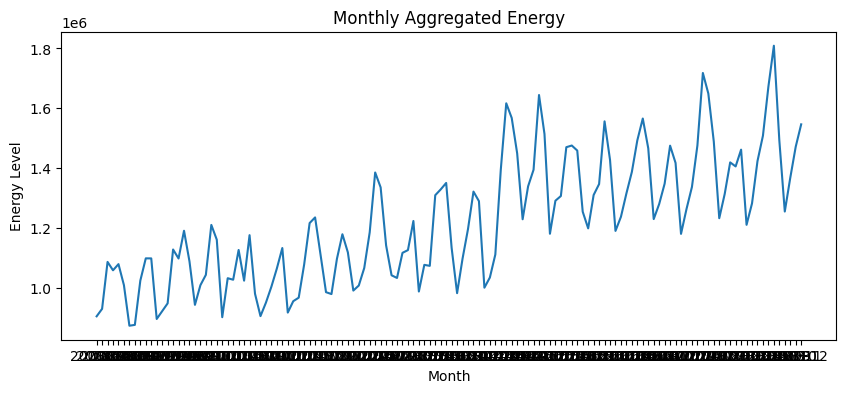

In [23]:
# monthly graph

df2 = df.copy()
df2['fiscalno'] = df2['datetime'].dt.strftime('%Y%m')
df2['year'] = df2['datetime'].dt.year

grp = df2.groupby('fiscalno')['energy'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(grp.fiscalno, grp.energy)
ax.set_title('Monthly Aggregated Energy')
ax.set_xlabel('Month')
ax.set_ylabel('Energy Level')
plt.show()

In [26]:
df2.head()

,row_id,datetime,energy,fiscalno,year
0,1,2008-03-01 00:00:00,1259.985563,200803,2008
1,2,2008-03-01 01:00:00,1095.541500,200803,2008
2,3,2008-03-01 02:00:00,1056.247500,200803,2008
3,4,2008-03-01 03:00:00,1034.742000,200803,2008
4,5,2008-03-01 04:00:00,1026.334500,200803,2008


In [36]:
# in each year see which months use the most energy

yrs = df2['year'].unique()

month_df = df2.copy()
month_df['month'] = month_df['datetime'].dt.month
#print(tmp.head())
grpd = month_df.groupby('month')['energy'].sum().reset_index()

for y in yrs:
    tmp = df2[df2['year'] == y]
    tmp['month'] = df2['datetime'].dt.month
    #print(tmp.head())
    grp = tmp.groupby('month')['energy'].sum().reset_index()

    tmp_tot = grp['energy'].sum()
    grpd[f'annual_pct_{y}'] = grp['energy'] / tmp_tot
    #print(grp)
print(grpd)
grp_ann = grpd.drop(['energy'], axis=1).set_index('month')

/Users/Ty/Code/Pets/forecast/env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


    month        energy  annual_pct_2008  annual_pct_2009  annual_pct_2010  \
0       1  1.283984e+07         0.091010         0.087348         0.093989   
1       2  1.044858e+07         0.093525         0.071222         0.072986   
2       3  1.199964e+07         0.109332         0.073318         0.083551   
3       4  1.249890e+07         0.106506         0.075380         0.083141   
4       5  1.414569e+07         0.108592         0.089718         0.091212   
5       6  1.508276e+07         0.101493         0.087322         0.082893   
6       7  1.541426e+07         0.087842         0.094712         0.095218   
7       8  1.360791e+07         0.088126         0.086550         0.079338   
8       9  1.186909e+07         0.103042         0.074983         0.073279   
9      10  1.254888e+07         0.110532         0.080214         0.076937   
10     11  1.345635e+07              NaN         0.082972         0.081260   
11     12  1.462330e+07              NaN         0.096263       

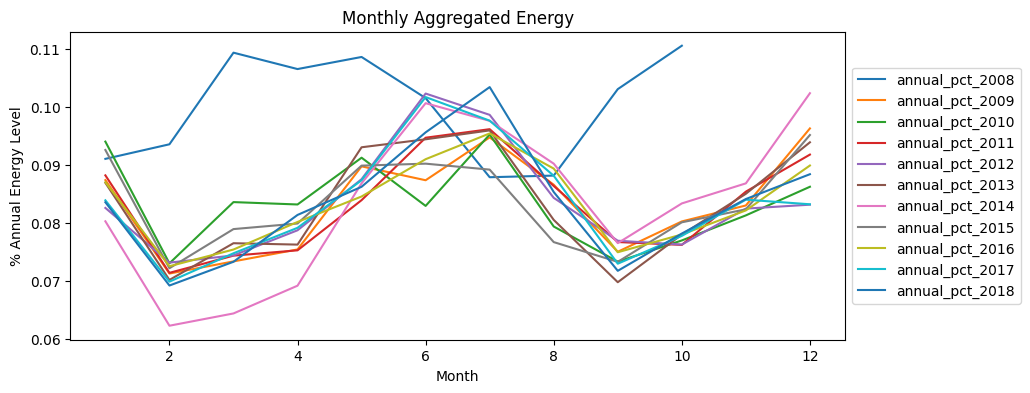

In [41]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(grp_ann)
ax.set_title('Monthly Aggregated Energy')
ax.set_xlabel('Month')
ax.set_ylabel('% Annual Energy Level')
#plt.legend(grp_ann.columns)
plt.legend(grp_ann.columns, loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# explor 2008 and why its seasonality is different